In [3]:
#import networkx as nx
#import pandas as pd
#import matplotlib.pyplot as plt
import matplotlib.pyplot as plt


In [4]:
def V(num):
    return 4*num+1

def S(num):
    return 2*num+1

def fG(num):
    return 2*num-1

def ruleTwo(num):
        result = (num-1)/2
        r = 0
        k = 0

        while result % 2 != 0:
            result = (result-1)/2
            k+=1

        r = result/2

        if ((k) % 2 == 0 and r % 2 == 0) or ((k) % 2 != 0 and r % 2 != 0):
            return (True)
        else:
            return (False)

def isIncluded(numberArr, number):
    # for i in arr:
    #     if i == num:
    #         return True
        
    # return False
    if len(numberArr) > 0:
        numberArr.sort()
        
        left = int(0)
        right = int(len(numberArr)-1)
        i = int(0)
        
        
        while left <= right:
            
            i = int((left + right)/2)
            if numberArr[i] == number:
                return True
            
            elif numberArr[i] < number:
                left = i+1
            else:
                right = i-1
        
            
        if numberArr[i] == number:
            return True
        else:
            return False
    else:
        return False

def getType(label):
    if (label + 1) % 3 == 0:
        return 1
    elif label % 3 == 0:
        return 2
    elif (label - 1) % 3 == 0:
        return 3
    return -1

arrInfo = []
rowStartLabel = []
saveArrInfo = []

def setStartArr(n):
    for i in range(0,n):
        if i == 0:
            arrInfo.append(0)
            saveArrInfo.append(0)
            rowStartLabel.append(1)
        elif i == 1:
            arrInfo.append(0)
            saveArrInfo.append(0)
            rowStartLabel.append(3)
        elif i == 2:
            arrInfo.append(1)
            saveArrInfo.append(1)
            rowStartLabel.append(5)
        else:
            arrInfo.append(2**(i-1))
            saveArrInfo.append(2**(i-1))
            rowStartLabel.append(2**i + 1)

    return arrInfo, saveArrInfo, rowStartLabel


def numbersAbove(arrOne, arrTwo, row):
    count = 0
    
    for i in range(row, len(arrOne)):
        count += (arrOne[i]-arrTwo[i])

    return count

def getCounter(rowStartLabel, value):
    
    counter = 0
    
    for start in rowStartLabel:
        if counter != len(rowStartLabel):
            if value < rowStartLabel[counter]:
                break
            else:
                counter = counter + 1
        elif counter == len(rowStartLabel):
            break

    return counter


[0, 0, 1, 4, 8]
3: 5
[0, 0, 0, 2, 5]
4: 4
[0, 0, 0, 0, 4]

expenses of the compleded rows starting with row 3
[5, 4]

total expense


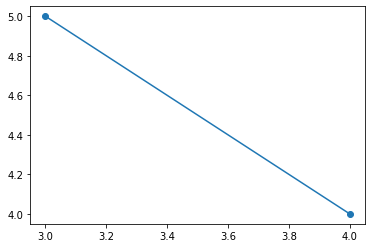


log(expense)


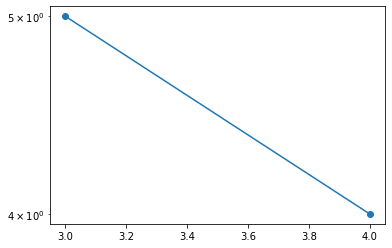


difference


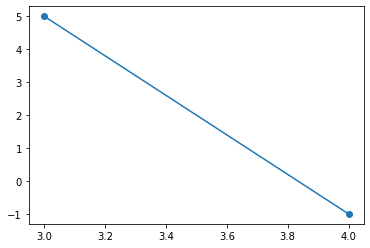

In [5]:
# Change n to choose size of Tree

n=5


expenses = []
rows = []
big_leaf = (2**n)-1
used = []
proven = []
proven.append(3)
proven.append(5)
arrInfo = []
rowStartLabel = []
saveArrInfo = []
arrInfo, saveArrInfo, rowStartLabel = setStartArr(n)
counter = 0

print(arrInfo)

while len(proven) > 0:
    proven.sort()
    #print(proven)
    
    for i in proven:   
        if isIncluded(used, i) == False:       
            
            # RULE 1 : if x is orange V(x) becomes orange 
            if V(i) <= big_leaf + 1:                
                value1 = V(i)
                counter = 0
                
                if isIncluded(used, value1) == False:
                    proven.append(V(i))                 
                    counter = getCounter(rowStartLabel, value1)
                    arrInfo[counter-1] -= 1
                    
                    if arrInfo[counter-1] == 0:
                        expense = numbersAbove(saveArrInfo, arrInfo, counter)
                        expenses.append(expense)
                        rows.append(counter)
                        print("{0}: {1}".format(counter, expense))
                        print("{0}".format(arrInfo))

            # RULE 2 : if x is orange S(x) becomes orange (under the precise conditions of rule 2)
            r2 = ruleTwo(i)
            if r2: 
                
                if S(i) <= big_leaf + 1:
                    value2 = S(i)
                    counter = 0
                    
                    if isIncluded(used, value2) == False:
                        proven.append(S(i))
                        counter = getCounter(rowStartLabel, value2)
                        arrInfo[counter-1] -= 1

                        if arrInfo[counter-1] == 0:
                            expense = numbersAbove(saveArrInfo, arrInfo, counter)
                            expenses.append(expense)
                            rows.append(counter)
                            print("{0}: {1}".format(counter, expense))
                            print("{0}".format(arrInfo))

            # # RULE 3 : if x is orange and of type C then (4x-1)/3 becomes orange
            if getType(i) == 3:             
                value3 = int((4*i-1)/3)
                counter = 0
                
                if value3 <= big_leaf + 1:  
                    
                    if isIncluded(used, value3) == False:
                        proven.append(value3)
                        counter = getCounter(rowStartLabel, value3)                     
                        arrInfo[counter-1] -= 1
                        
                        if arrInfo[counter-1] == 0:
                            expense = numbersAbove(saveArrInfo, arrInfo, counter)
                            expenses.append(expense)
                            rows.append(counter)
                            print("{0}: {1}".format(counter, expense))
                            print("{0}".format(arrInfo))

            # # RULE 4 : if x is orange and of type A then G(x)/3 becomes orange                   
            if getType(i) == 1:                       
                value4 = int(fG(i)/3)                                     
                
                if isIncluded(used, value4) == False:   
                    proven.append(value4)
                    #print(value4)
                    counter = 0 
                    counter = getCounter(rowStartLabel, value4)               
                    arrInfo[counter-1] -= 1
                    
                    if arrInfo[counter-1] == 0:
                        expense = numbersAbove(saveArrInfo, arrInfo, counter)
                        expenses.append(expense)
                        rows.append(counter)
                        print("{0}: {1}".format(counter, expense))
                        print("{0}".format(arrInfo))

            proven.remove(i)
            used.append(i)
            break
        else:
            proven.remove(i)

dif = []
for i in range(0,len(expenses)):
    if i == 0:
        dif.append(expenses[i])
    else:
        dif.append(expenses[i] - expenses[i-1])

print()
print("expenses of the compleded rows starting with row 3")
print(expenses)
print()
print("total expense")
plt.plot(rows, expenses, marker = 'o', linestyle = 'solid')
plt.show()
plt.savefig("expanses.png",dpi=300)
print()
print("log(expense)")
plt.yscale('log')
plt.plot(rows, expenses, marker = 'o', linestyle = 'solid')
plt.show()
plt.savefig("expanses_log2.png",dpi=300)
print()
print("difference")
plt.plot(rows, dif, marker = 'o', linestyle = 'solid')
plt.show()




[0, 0, 1, 4, 8, 16]
3: 8
[0, 0, 0, 2, 5, 13]
4: 7
[0, 0, 0, 0, 4, 13]

expenses of the compleded rows starting with row 3
[8, 7]

total expense


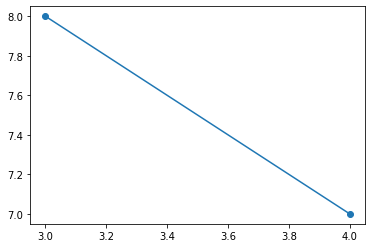


log(expense)


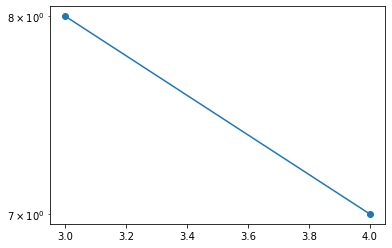


difference


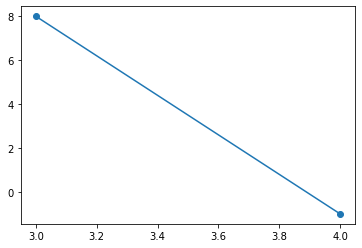

In [6]:
n=6


expenses = []
rows = []
big_leaf = (2**n)-1
used = []
proven = []
proven.append(3)
proven.append(5)
arrInfo = []
rowStartLabel = []
saveArrInfo = []
arrInfo, saveArrInfo, rowStartLabel = setStartArr(n)
counter = 0

print(arrInfo)

while len(proven) > 0:
    proven.sort()
    #print(proven)
    
    for i in proven:   
        if isIncluded(used, i) == False:       
            
            # RULE 1 : if x is orange V(x) becomes orange 
            if V(i) <= big_leaf + 1:                
                value1 = V(i)
                counter = 0
                
                if isIncluded(used, value1) == False:
                    proven.append(V(i))                 
                    counter = getCounter(rowStartLabel, value1)
                    arrInfo[counter-1] -= 1
                    
                    if arrInfo[counter-1] == 0:
                        expense = numbersAbove(saveArrInfo, arrInfo, counter)
                        expenses.append(expense)
                        rows.append(counter)
                        print("{0}: {1}".format(counter, expense))
                        print("{0}".format(arrInfo))

            # RULE 2 : if x is orange S(x) becomes orange (under the precise conditions of rule 2)
            r2 = ruleTwo(i)
            if r2: 
                
                if S(i) <= big_leaf + 1:
                    value2 = S(i)
                    counter = 0
                    
                    if isIncluded(used, value2) == False:
                        proven.append(S(i))
                        counter = getCounter(rowStartLabel, value2)
                        arrInfo[counter-1] -= 1

                        if arrInfo[counter-1] == 0:
                            expense = numbersAbove(saveArrInfo, arrInfo, counter)
                            expenses.append(expense)
                            rows.append(counter)
                            print("{0}: {1}".format(counter, expense))
                            print("{0}".format(arrInfo))

            # # RULE 3 : if x is orange and of type C then (4x-1)/3 becomes orange
            if getType(i) == 3:             
                value3 = int((4*i-1)/3)
                counter = 0
                
                if value3 <= big_leaf + 1:  
                    
                    if isIncluded(used, value3) == False:
                        proven.append(value3)
                        counter = getCounter(rowStartLabel, value3)                     
                        arrInfo[counter-1] -= 1
                        
                        if arrInfo[counter-1] == 0:
                            expense = numbersAbove(saveArrInfo, arrInfo, counter)
                            expenses.append(expense)
                            rows.append(counter)
                            print("{0}: {1}".format(counter, expense))
                            print("{0}".format(arrInfo))

            # # RULE 4 : if x is orange and of type A then G(x)/3 becomes orange                   
            if getType(i) == 1:                       
                value4 = int(fG(i)/3)                                     
                
                if isIncluded(used, value4) == False:   
                    proven.append(value4)
                    #print(value4)
                    counter = 0 
                    counter = getCounter(rowStartLabel, value4)               
                    arrInfo[counter-1] -= 1
                    
                    if arrInfo[counter-1] == 0:
                        expense = numbersAbove(saveArrInfo, arrInfo, counter)
                        expenses.append(expense)
                        rows.append(counter)
                        print("{0}: {1}".format(counter, expense))
                        print("{0}".format(arrInfo))

            proven.remove(i)
            used.append(i)
            break
        else:
            proven.remove(i)

dif = []
for i in range(0,len(expenses)):
    if i == 0:
        dif.append(expenses[i])
    else:
        dif.append(expenses[i] - expenses[i-1])

print()
print("expenses of the compleded rows starting with row 3")
print(expenses)
print()
print("total expense")
plt.plot(rows, expenses, marker = 'o', linestyle = 'solid')
plt.show()
plt.savefig("expanses.png",dpi=300)
print()
print("log(expense)")
plt.yscale('log')
plt.plot(rows, expenses, marker = 'o', linestyle = 'solid')
plt.show()
plt.savefig("expanses_log2.png",dpi=300)
print()
print("difference")
plt.plot(rows, dif, marker = 'o', linestyle = 'solid')
plt.show()




[0, 0, 1, 4, 8, 16, 32]
3: 9
[0, 0, 0, 2, 5, 13, 31]
4: 8
[0, 0, 0, 0, 4, 13, 31]

expenses of the compleded rows starting with row 3
[9, 8]

total expense


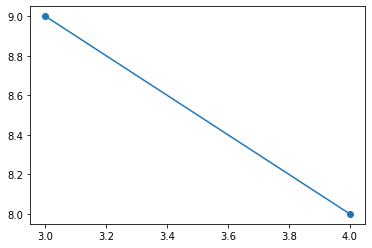


log(expense)


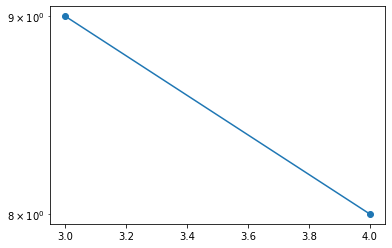


difference


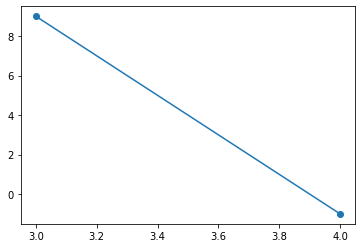

In [7]:
n=7


expenses = []
rows = []
big_leaf = (2**n)-1
used = []
proven = []
proven.append(3)
proven.append(5)
arrInfo = []
rowStartLabel = []
saveArrInfo = []
arrInfo, saveArrInfo, rowStartLabel = setStartArr(n)
counter = 0

print(arrInfo)

while len(proven) > 0:
    proven.sort()
    #print(proven)
    
    for i in proven:   
        if isIncluded(used, i) == False:       
            
            # RULE 1 : if x is orange V(x) becomes orange 
            if V(i) <= big_leaf + 1:                
                value1 = V(i)
                counter = 0
                
                if isIncluded(used, value1) == False:
                    proven.append(V(i))                 
                    counter = getCounter(rowStartLabel, value1)
                    arrInfo[counter-1] -= 1
                    
                    if arrInfo[counter-1] == 0:
                        expense = numbersAbove(saveArrInfo, arrInfo, counter)
                        expenses.append(expense)
                        rows.append(counter)
                        print("{0}: {1}".format(counter, expense))
                        print("{0}".format(arrInfo))

            # RULE 2 : if x is orange S(x) becomes orange (under the precise conditions of rule 2)
            r2 = ruleTwo(i)
            if r2: 
                
                if S(i) <= big_leaf + 1:
                    value2 = S(i)
                    counter = 0
                    
                    if isIncluded(used, value2) == False:
                        proven.append(S(i))
                        counter = getCounter(rowStartLabel, value2)
                        arrInfo[counter-1] -= 1

                        if arrInfo[counter-1] == 0:
                            expense = numbersAbove(saveArrInfo, arrInfo, counter)
                            expenses.append(expense)
                            rows.append(counter)
                            print("{0}: {1}".format(counter, expense))
                            print("{0}".format(arrInfo))

            # # RULE 3 : if x is orange and of type C then (4x-1)/3 becomes orange
            if getType(i) == 3:             
                value3 = int((4*i-1)/3)
                counter = 0
                
                if value3 <= big_leaf + 1:  
                    
                    if isIncluded(used, value3) == False:
                        proven.append(value3)
                        counter = getCounter(rowStartLabel, value3)                     
                        arrInfo[counter-1] -= 1
                        
                        if arrInfo[counter-1] == 0:
                            expense = numbersAbove(saveArrInfo, arrInfo, counter)
                            expenses.append(expense)
                            rows.append(counter)
                            print("{0}: {1}".format(counter, expense))
                            print("{0}".format(arrInfo))

            # # RULE 4 : if x is orange and of type A then G(x)/3 becomes orange                   
            if getType(i) == 1:                       
                value4 = int(fG(i)/3)                                     
                
                if isIncluded(used, value4) == False:   
                    proven.append(value4)
                    #print(value4)
                    counter = 0 
                    counter = getCounter(rowStartLabel, value4)               
                    arrInfo[counter-1] -= 1
                    
                    if arrInfo[counter-1] == 0:
                        expense = numbersAbove(saveArrInfo, arrInfo, counter)
                        expenses.append(expense)
                        rows.append(counter)
                        print("{0}: {1}".format(counter, expense))
                        print("{0}".format(arrInfo))

            proven.remove(i)
            used.append(i)
            break
        else:
            proven.remove(i)

dif = []
for i in range(0,len(expenses)):
    if i == 0:
        dif.append(expenses[i])
    else:
        dif.append(expenses[i] - expenses[i-1])

print()
print("expenses of the compleded rows starting with row 3")
print(expenses)
print()
print("total expense")
plt.plot(rows, expenses, marker = 'o', linestyle = 'solid')
plt.show()
plt.savefig("expanses.png",dpi=300)
print()
print("log(expense)")
plt.yscale('log')
plt.plot(rows, expenses, marker = 'o', linestyle = 'solid')
plt.show()
plt.savefig("expanses_log2.png",dpi=300)
print()
print("difference")
plt.plot(rows, dif, marker = 'o', linestyle = 'solid')
plt.show()




[0, 0, 1, 4, 8, 16, 32, 64]
3: 9
[0, 0, 0, 2, 5, 13, 31, 64]
4: 8
[0, 0, 0, 0, 4, 13, 31, 64]

expenses of the compleded rows starting with row 3
[9, 8]

total expense


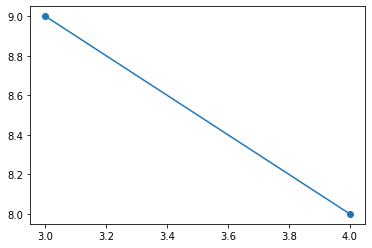


log(expense)


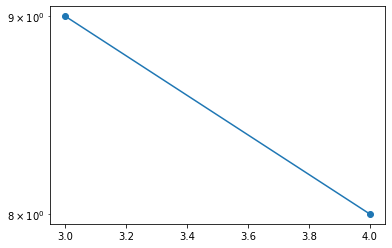


difference


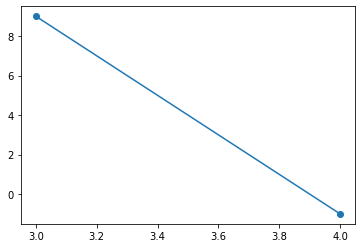

In [8]:
n=8


expenses = []
rows = []
big_leaf = (2**n)-1
used = []
proven = []
proven.append(3)
proven.append(5)
arrInfo = []
rowStartLabel = []
saveArrInfo = []
arrInfo, saveArrInfo, rowStartLabel = setStartArr(n)
counter = 0

print(arrInfo)

while len(proven) > 0:
    proven.sort()
    #print(proven)
    
    for i in proven:   
        if isIncluded(used, i) == False:       
            
            # RULE 1 : if x is orange V(x) becomes orange 
            if V(i) <= big_leaf + 1:                
                value1 = V(i)
                counter = 0
                
                if isIncluded(used, value1) == False:
                    proven.append(V(i))                 
                    counter = getCounter(rowStartLabel, value1)
                    arrInfo[counter-1] -= 1
                    
                    if arrInfo[counter-1] == 0:
                        expense = numbersAbove(saveArrInfo, arrInfo, counter)
                        expenses.append(expense)
                        rows.append(counter)
                        print("{0}: {1}".format(counter, expense))
                        print("{0}".format(arrInfo))

            # RULE 2 : if x is orange S(x) becomes orange (under the precise conditions of rule 2)
            r2 = ruleTwo(i)
            if r2: 
                
                if S(i) <= big_leaf + 1:
                    value2 = S(i)
                    counter = 0
                    
                    if isIncluded(used, value2) == False:
                        proven.append(S(i))
                        counter = getCounter(rowStartLabel, value2)
                        arrInfo[counter-1] -= 1

                        if arrInfo[counter-1] == 0:
                            expense = numbersAbove(saveArrInfo, arrInfo, counter)
                            expenses.append(expense)
                            rows.append(counter)
                            print("{0}: {1}".format(counter, expense))
                            print("{0}".format(arrInfo))

            # # RULE 3 : if x is orange and of type C then (4x-1)/3 becomes orange
            if getType(i) == 3:             
                value3 = int((4*i-1)/3)
                counter = 0
                
                if value3 <= big_leaf + 1:  
                    
                    if isIncluded(used, value3) == False:
                        proven.append(value3)
                        counter = getCounter(rowStartLabel, value3)                     
                        arrInfo[counter-1] -= 1
                        
                        if arrInfo[counter-1] == 0:
                            expense = numbersAbove(saveArrInfo, arrInfo, counter)
                            expenses.append(expense)
                            rows.append(counter)
                            print("{0}: {1}".format(counter, expense))
                            print("{0}".format(arrInfo))

            # # RULE 4 : if x is orange and of type A then G(x)/3 becomes orange                   
            if getType(i) == 1:                       
                value4 = int(fG(i)/3)                                     
                
                if isIncluded(used, value4) == False:   
                    proven.append(value4)
                    #print(value4)
                    counter = 0 
                    counter = getCounter(rowStartLabel, value4)               
                    arrInfo[counter-1] -= 1
                    
                    if arrInfo[counter-1] == 0:
                        expense = numbersAbove(saveArrInfo, arrInfo, counter)
                        expenses.append(expense)
                        rows.append(counter)
                        print("{0}: {1}".format(counter, expense))
                        print("{0}".format(arrInfo))

            proven.remove(i)
            used.append(i)
            break
        else:
            proven.remove(i)

dif = []
for i in range(0,len(expenses)):
    if i == 0:
        dif.append(expenses[i])
    else:
        dif.append(expenses[i] - expenses[i-1])

print()
print("expenses of the compleded rows starting with row 3")
print(expenses)
print()
print("total expense")
plt.plot(rows, expenses, marker = 'o', linestyle = 'solid')
plt.show()
plt.savefig("expanses.png",dpi=300)
print()
print("log(expense)")
plt.yscale('log')
plt.plot(rows, expenses, marker = 'o', linestyle = 'solid')
plt.show()
plt.savefig("expanses_log2.png",dpi=300)
print()
print("difference")
plt.plot(rows, dif, marker = 'o', linestyle = 'solid')
plt.show()




[0, 0, 1, 4, 8, 16, 32, 64, 128]
3: 9
[0, 0, 0, 2, 5, 13, 31, 64, 128]
4: 8
[0, 0, 0, 0, 4, 13, 31, 64, 128]

expenses of the compleded rows starting with row 3
[9, 8]

total expense


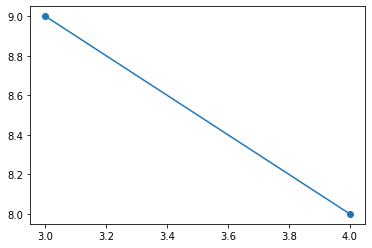


log(expense)


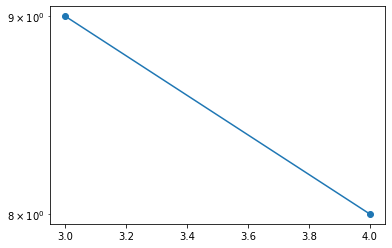


difference


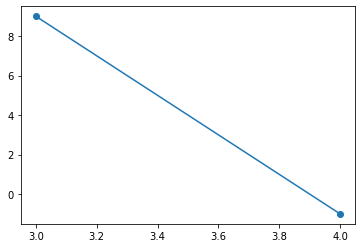

In [9]:
n=9


expenses = []
rows = []
big_leaf = (2**n)-1
used = []
proven = []
proven.append(3)
proven.append(5)
arrInfo = []
rowStartLabel = []
saveArrInfo = []
arrInfo, saveArrInfo, rowStartLabel = setStartArr(n)
counter = 0

print(arrInfo)

while len(proven) > 0:
    proven.sort()
    #print(proven)
    
    for i in proven:   
        if isIncluded(used, i) == False:       
            
            # RULE 1 : if x is orange V(x) becomes orange 
            if V(i) <= big_leaf + 1:                
                value1 = V(i)
                counter = 0
                
                if isIncluded(used, value1) == False:
                    proven.append(V(i))                 
                    counter = getCounter(rowStartLabel, value1)
                    arrInfo[counter-1] -= 1
                    
                    if arrInfo[counter-1] == 0:
                        expense = numbersAbove(saveArrInfo, arrInfo, counter)
                        expenses.append(expense)
                        rows.append(counter)
                        print("{0}: {1}".format(counter, expense))
                        print("{0}".format(arrInfo))

            # RULE 2 : if x is orange S(x) becomes orange (under the precise conditions of rule 2)
            r2 = ruleTwo(i)
            if r2: 
                
                if S(i) <= big_leaf + 1:
                    value2 = S(i)
                    counter = 0
                    
                    if isIncluded(used, value2) == False:
                        proven.append(S(i))
                        counter = getCounter(rowStartLabel, value2)
                        arrInfo[counter-1] -= 1

                        if arrInfo[counter-1] == 0:
                            expense = numbersAbove(saveArrInfo, arrInfo, counter)
                            expenses.append(expense)
                            rows.append(counter)
                            print("{0}: {1}".format(counter, expense))
                            print("{0}".format(arrInfo))

            # # RULE 3 : if x is orange and of type C then (4x-1)/3 becomes orange
            if getType(i) == 3:             
                value3 = int((4*i-1)/3)
                counter = 0
                
                if value3 <= big_leaf + 1:  
                    
                    if isIncluded(used, value3) == False:
                        proven.append(value3)
                        counter = getCounter(rowStartLabel, value3)                     
                        arrInfo[counter-1] -= 1
                        
                        if arrInfo[counter-1] == 0:
                            expense = numbersAbove(saveArrInfo, arrInfo, counter)
                            expenses.append(expense)
                            rows.append(counter)
                            print("{0}: {1}".format(counter, expense))
                            print("{0}".format(arrInfo))

            # # RULE 4 : if x is orange and of type A then G(x)/3 becomes orange                   
            if getType(i) == 1:                       
                value4 = int(fG(i)/3)                                     
                
                if isIncluded(used, value4) == False:   
                    proven.append(value4)
                    #print(value4)
                    counter = 0 
                    counter = getCounter(rowStartLabel, value4)               
                    arrInfo[counter-1] -= 1
                    
                    if arrInfo[counter-1] == 0:
                        expense = numbersAbove(saveArrInfo, arrInfo, counter)
                        expenses.append(expense)
                        rows.append(counter)
                        print("{0}: {1}".format(counter, expense))
                        print("{0}".format(arrInfo))

            proven.remove(i)
            used.append(i)
            break
        else:
            proven.remove(i)

dif = []
for i in range(0,len(expenses)):
    if i == 0:
        dif.append(expenses[i])
    else:
        dif.append(expenses[i] - expenses[i-1])

print()
print("expenses of the compleded rows starting with row 3")
print(expenses)
print()
print("total expense")
plt.plot(rows, expenses, marker = 'o', linestyle = 'solid')
plt.show()
plt.savefig("expanses.png",dpi=300)
print()
print("log(expense)")
plt.yscale('log')
plt.plot(rows, expenses, marker = 'o', linestyle = 'solid')
plt.show()
plt.savefig("expanses_log2.png",dpi=300)
print()
print("difference")
plt.plot(rows, dif, marker = 'o', linestyle = 'solid')
plt.show()




[0, 0, 1, 4, 8, 16, 32, 64, 128, 256]
3: 9
[0, 0, 0, 2, 5, 13, 31, 64, 128, 256]
4: 8
[0, 0, 0, 0, 4, 13, 31, 64, 128, 256]

expenses of the compleded rows starting with row 3
[9, 8]

total expense


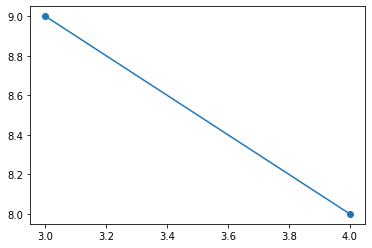


log(expense)


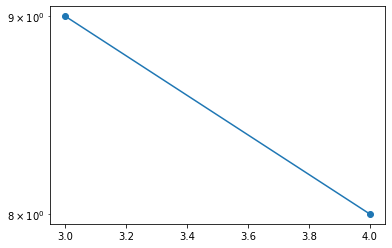


difference


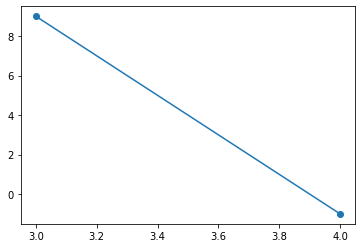

In [10]:
n=10


expenses = []
rows = []
big_leaf = (2**n)-1
used = []
proven = []
proven.append(3)
proven.append(5)
arrInfo = []
rowStartLabel = []
saveArrInfo = []
arrInfo, saveArrInfo, rowStartLabel = setStartArr(n)
counter = 0

print(arrInfo)

while len(proven) > 0:
    proven.sort()
    #print(proven)
    
    for i in proven:   
        if isIncluded(used, i) == False:       
            
            # RULE 1 : if x is orange V(x) becomes orange 
            if V(i) <= big_leaf + 1:                
                value1 = V(i)
                counter = 0
                
                if isIncluded(used, value1) == False:
                    proven.append(V(i))                 
                    counter = getCounter(rowStartLabel, value1)
                    arrInfo[counter-1] -= 1
                    
                    if arrInfo[counter-1] == 0:
                        expense = numbersAbove(saveArrInfo, arrInfo, counter)
                        expenses.append(expense)
                        rows.append(counter)
                        print("{0}: {1}".format(counter, expense))
                        print("{0}".format(arrInfo))

            # RULE 2 : if x is orange S(x) becomes orange (under the precise conditions of rule 2)
            r2 = ruleTwo(i)
            if r2: 
                
                if S(i) <= big_leaf + 1:
                    value2 = S(i)
                    counter = 0
                    
                    if isIncluded(used, value2) == False:
                        proven.append(S(i))
                        counter = getCounter(rowStartLabel, value2)
                        arrInfo[counter-1] -= 1

                        if arrInfo[counter-1] == 0:
                            expense = numbersAbove(saveArrInfo, arrInfo, counter)
                            expenses.append(expense)
                            rows.append(counter)
                            print("{0}: {1}".format(counter, expense))
                            print("{0}".format(arrInfo))

            # # RULE 3 : if x is orange and of type C then (4x-1)/3 becomes orange
            if getType(i) == 3:             
                value3 = int((4*i-1)/3)
                counter = 0
                
                if value3 <= big_leaf + 1:  
                    
                    if isIncluded(used, value3) == False:
                        proven.append(value3)
                        counter = getCounter(rowStartLabel, value3)                     
                        arrInfo[counter-1] -= 1
                        
                        if arrInfo[counter-1] == 0:
                            expense = numbersAbove(saveArrInfo, arrInfo, counter)
                            expenses.append(expense)
                            rows.append(counter)
                            print("{0}: {1}".format(counter, expense))
                            print("{0}".format(arrInfo))

            # # RULE 4 : if x is orange and of type A then G(x)/3 becomes orange                   
            if getType(i) == 1:                       
                value4 = int(fG(i)/3)                                     
                
                if isIncluded(used, value4) == False:   
                    proven.append(value4)
                    #print(value4)
                    counter = 0 
                    counter = getCounter(rowStartLabel, value4)               
                    arrInfo[counter-1] -= 1
                    
                    if arrInfo[counter-1] == 0:
                        expense = numbersAbove(saveArrInfo, arrInfo, counter)
                        expenses.append(expense)
                        rows.append(counter)
                        print("{0}: {1}".format(counter, expense))
                        print("{0}".format(arrInfo))

            proven.remove(i)
            used.append(i)
            break
        else:
            proven.remove(i)

dif = []
for i in range(0,len(expenses)):
    if i == 0:
        dif.append(expenses[i])
    else:
        dif.append(expenses[i] - expenses[i-1])

print()
print("expenses of the compleded rows starting with row 3")
print(expenses)
print()
print("total expense")
plt.plot(rows, expenses, marker = 'o', linestyle = 'solid')
plt.show()
plt.savefig("expanses.png",dpi=300)
print()
print("log(expense)")
plt.yscale('log')
plt.plot(rows, expenses, marker = 'o', linestyle = 'solid')
plt.show()
plt.savefig("expanses_log2.png",dpi=300)
print()
print("difference")
plt.plot(rows, dif, marker = 'o', linestyle = 'solid')
plt.show()




[0, 0, 1, 4, 8, 16, 32, 64, 128, 256, 512]
3: 9
[0, 0, 0, 2, 5, 13, 31, 64, 128, 256, 512]
4: 8
[0, 0, 0, 0, 4, 13, 31, 64, 128, 256, 512]
5: 418
[0, 0, 0, 0, 0, 1, 4, 15, 43, 140, 387]
6: 404
[0, 0, 0, 0, 0, 0, 3, 15, 43, 140, 387]
7: 644
[0, 0, 0, 0, 0, 0, 0, 3, 9, 59, 245]
8: 586
[0, 0, 0, 0, 0, 0, 0, 0, 7, 58, 245]

expenses of the compleded rows starting with row 3
[9, 8, 418, 404, 644, 586]

total expense


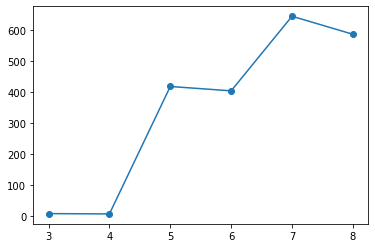


log(expense)


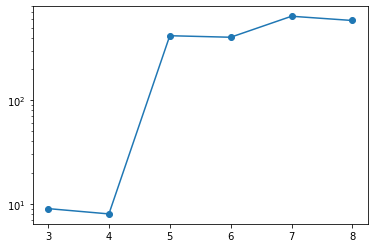


difference


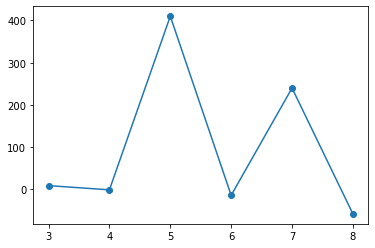

In [11]:
n=11


expenses = []
rows = []
big_leaf = (2**n)-1
used = []
proven = []
proven.append(3)
proven.append(5)
arrInfo = []
rowStartLabel = []
saveArrInfo = []
arrInfo, saveArrInfo, rowStartLabel = setStartArr(n)
counter = 0

print(arrInfo)

while len(proven) > 0:
    proven.sort()
    #print(proven)
    
    for i in proven:   
        if isIncluded(used, i) == False:       
            
            # RULE 1 : if x is orange V(x) becomes orange 
            if V(i) <= big_leaf + 1:                
                value1 = V(i)
                counter = 0
                
                if isIncluded(used, value1) == False:
                    proven.append(V(i))                 
                    counter = getCounter(rowStartLabel, value1)
                    arrInfo[counter-1] -= 1
                    
                    if arrInfo[counter-1] == 0:
                        expense = numbersAbove(saveArrInfo, arrInfo, counter)
                        expenses.append(expense)
                        rows.append(counter)
                        print("{0}: {1}".format(counter, expense))
                        print("{0}".format(arrInfo))

            # RULE 2 : if x is orange S(x) becomes orange (under the precise conditions of rule 2)
            r2 = ruleTwo(i)
            if r2: 
                
                if S(i) <= big_leaf + 1:
                    value2 = S(i)
                    counter = 0
                    
                    if isIncluded(used, value2) == False:
                        proven.append(S(i))
                        counter = getCounter(rowStartLabel, value2)
                        arrInfo[counter-1] -= 1

                        if arrInfo[counter-1] == 0:
                            expense = numbersAbove(saveArrInfo, arrInfo, counter)
                            expenses.append(expense)
                            rows.append(counter)
                            print("{0}: {1}".format(counter, expense))
                            print("{0}".format(arrInfo))

            # # RULE 3 : if x is orange and of type C then (4x-1)/3 becomes orange
            if getType(i) == 3:             
                value3 = int((4*i-1)/3)
                counter = 0
                
                if value3 <= big_leaf + 1:  
                    
                    if isIncluded(used, value3) == False:
                        proven.append(value3)
                        counter = getCounter(rowStartLabel, value3)                     
                        arrInfo[counter-1] -= 1
                        
                        if arrInfo[counter-1] == 0:
                            expense = numbersAbove(saveArrInfo, arrInfo, counter)
                            expenses.append(expense)
                            rows.append(counter)
                            print("{0}: {1}".format(counter, expense))
                            print("{0}".format(arrInfo))

            # # RULE 4 : if x is orange and of type A then G(x)/3 becomes orange                   
            if getType(i) == 1:                       
                value4 = int(fG(i)/3)                                     
                
                if isIncluded(used, value4) == False:   
                    proven.append(value4)
                    #print(value4)
                    counter = 0 
                    counter = getCounter(rowStartLabel, value4)               
                    arrInfo[counter-1] -= 1
                    
                    if arrInfo[counter-1] == 0:
                        expense = numbersAbove(saveArrInfo, arrInfo, counter)
                        expenses.append(expense)
                        rows.append(counter)
                        print("{0}: {1}".format(counter, expense))
                        print("{0}".format(arrInfo))

            proven.remove(i)
            used.append(i)
            break
        else:
            proven.remove(i)

dif = []
for i in range(0,len(expenses)):
    if i == 0:
        dif.append(expenses[i])
    else:
        dif.append(expenses[i] - expenses[i-1])

print()
print("expenses of the compleded rows starting with row 3")
print(expenses)
print()
print("total expense")
plt.plot(rows, expenses, marker = 'o', linestyle = 'solid')
plt.show()
plt.savefig("expanses.png",dpi=300)
print()
print("log(expense)")
plt.yscale('log')
plt.plot(rows, expenses, marker = 'o', linestyle = 'solid')
plt.show()
plt.savefig("expanses_log2.png",dpi=300)
print()
print("difference")
plt.plot(rows, dif, marker = 'o', linestyle = 'solid')
plt.show()




[0, 0, 1, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
3: 9
[0, 0, 0, 2, 5, 13, 31, 64, 128, 256, 512, 1024]
4: 8
[0, 0, 0, 0, 4, 13, 31, 64, 128, 256, 512, 1024]
5: 518
[0, 0, 0, 0, 0, 1, 4, 15, 43, 140, 387, 924]
6: 504
[0, 0, 0, 0, 0, 0, 3, 15, 43, 140, 387, 924]
7: 875
[0, 0, 0, 0, 0, 0, 0, 3, 9, 59, 245, 793]
8: 817
[0, 0, 0, 0, 0, 0, 0, 0, 7, 58, 245, 793]

expenses of the compleded rows starting with row 3
[9, 8, 518, 504, 875, 817]

total expense


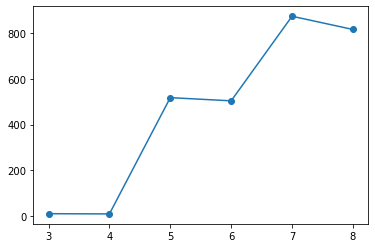


log(expense)


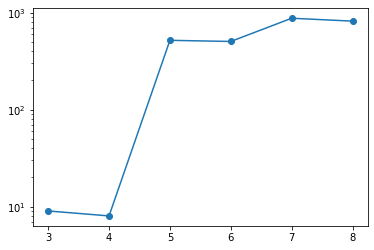


difference


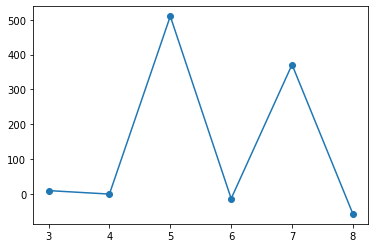

In [12]:
n=12


expenses = []
rows = []
big_leaf = (2**n)-1
used = []
proven = []
proven.append(3)
proven.append(5)
arrInfo = []
rowStartLabel = []
saveArrInfo = []
arrInfo, saveArrInfo, rowStartLabel = setStartArr(n)
counter = 0

print(arrInfo)

while len(proven) > 0:
    proven.sort()
    #print(proven)
    
    for i in proven:   
        if isIncluded(used, i) == False:       
            
            # RULE 1 : if x is orange V(x) becomes orange 
            if V(i) <= big_leaf + 1:                
                value1 = V(i)
                counter = 0
                
                if isIncluded(used, value1) == False:
                    proven.append(V(i))                 
                    counter = getCounter(rowStartLabel, value1)
                    arrInfo[counter-1] -= 1
                    
                    if arrInfo[counter-1] == 0:
                        expense = numbersAbove(saveArrInfo, arrInfo, counter)
                        expenses.append(expense)
                        rows.append(counter)
                        print("{0}: {1}".format(counter, expense))
                        print("{0}".format(arrInfo))

            # RULE 2 : if x is orange S(x) becomes orange (under the precise conditions of rule 2)
            r2 = ruleTwo(i)
            if r2: 
                
                if S(i) <= big_leaf + 1:
                    value2 = S(i)
                    counter = 0
                    
                    if isIncluded(used, value2) == False:
                        proven.append(S(i))
                        counter = getCounter(rowStartLabel, value2)
                        arrInfo[counter-1] -= 1

                        if arrInfo[counter-1] == 0:
                            expense = numbersAbove(saveArrInfo, arrInfo, counter)
                            expenses.append(expense)
                            rows.append(counter)
                            print("{0}: {1}".format(counter, expense))
                            print("{0}".format(arrInfo))

            # # RULE 3 : if x is orange and of type C then (4x-1)/3 becomes orange
            if getType(i) == 3:             
                value3 = int((4*i-1)/3)
                counter = 0
                
                if value3 <= big_leaf + 1:  
                    
                    if isIncluded(used, value3) == False:
                        proven.append(value3)
                        counter = getCounter(rowStartLabel, value3)                     
                        arrInfo[counter-1] -= 1
                        
                        if arrInfo[counter-1] == 0:
                            expense = numbersAbove(saveArrInfo, arrInfo, counter)
                            expenses.append(expense)
                            rows.append(counter)
                            print("{0}: {1}".format(counter, expense))
                            print("{0}".format(arrInfo))

            # # RULE 4 : if x is orange and of type A then G(x)/3 becomes orange                   
            if getType(i) == 1:                       
                value4 = int(fG(i)/3)                                     
                
                if isIncluded(used, value4) == False:   
                    proven.append(value4)
                    #print(value4)
                    counter = 0 
                    counter = getCounter(rowStartLabel, value4)               
                    arrInfo[counter-1] -= 1
                    
                    if arrInfo[counter-1] == 0:
                        expense = numbersAbove(saveArrInfo, arrInfo, counter)
                        expenses.append(expense)
                        rows.append(counter)
                        print("{0}: {1}".format(counter, expense))
                        print("{0}".format(arrInfo))

            proven.remove(i)
            used.append(i)
            break
        else:
            proven.remove(i)

dif = []
for i in range(0,len(expenses)):
    if i == 0:
        dif.append(expenses[i])
    else:
        dif.append(expenses[i] - expenses[i-1])

print()
print("expenses of the compleded rows starting with row 3")
print(expenses)
print()
print("total expense")
plt.plot(rows, expenses, marker = 'o', linestyle = 'solid')
plt.show()
plt.savefig("expanses.png",dpi=300)
print()
print("log(expense)")
plt.yscale('log')
plt.plot(rows, expenses, marker = 'o', linestyle = 'solid')
plt.show()
plt.savefig("expanses_log2.png",dpi=300)
print()
print("difference")
plt.plot(rows, dif, marker = 'o', linestyle = 'solid')
plt.show()




[0, 0, 1, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
3: 9
[0, 0, 0, 2, 5, 13, 31, 64, 128, 256, 512, 1024, 2048]
4: 8
[0, 0, 0, 0, 4, 13, 31, 64, 128, 256, 512, 1024, 2048]
5: 519
[0, 0, 0, 0, 0, 1, 4, 15, 43, 140, 387, 924, 2047]
6: 505
[0, 0, 0, 0, 0, 0, 3, 15, 43, 140, 387, 924, 2047]
7: 1002
[0, 0, 0, 0, 0, 0, 0, 3, 9, 59, 245, 793, 1921]
8: 944
[0, 0, 0, 0, 0, 0, 0, 0, 7, 58, 245, 793, 1921]

expenses of the compleded rows starting with row 3
[9, 8, 519, 505, 1002, 944]

total expense


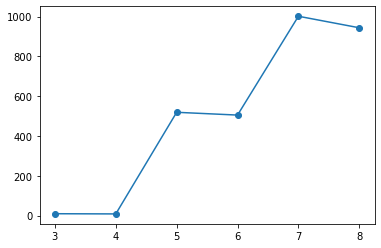


log(expense)


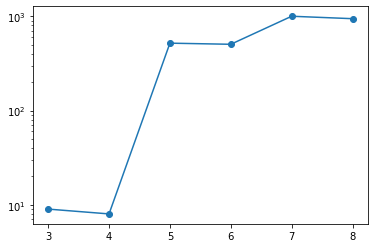


difference


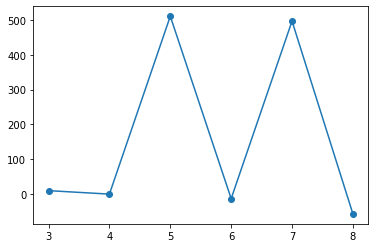

In [13]:
n=13


expenses = []
rows = []
big_leaf = (2**n)-1
used = []
proven = []
proven.append(3)
proven.append(5)
arrInfo = []
rowStartLabel = []
saveArrInfo = []
arrInfo, saveArrInfo, rowStartLabel = setStartArr(n)
counter = 0

print(arrInfo)

while len(proven) > 0:
    proven.sort()
    #print(proven)
    
    for i in proven:   
        if isIncluded(used, i) == False:       
            
            # RULE 1 : if x is orange V(x) becomes orange 
            if V(i) <= big_leaf + 1:                
                value1 = V(i)
                counter = 0
                
                if isIncluded(used, value1) == False:
                    proven.append(V(i))                 
                    counter = getCounter(rowStartLabel, value1)
                    arrInfo[counter-1] -= 1
                    
                    if arrInfo[counter-1] == 0:
                        expense = numbersAbove(saveArrInfo, arrInfo, counter)
                        expenses.append(expense)
                        rows.append(counter)
                        print("{0}: {1}".format(counter, expense))
                        print("{0}".format(arrInfo))

            # RULE 2 : if x is orange S(x) becomes orange (under the precise conditions of rule 2)
            r2 = ruleTwo(i)
            if r2: 
                
                if S(i) <= big_leaf + 1:
                    value2 = S(i)
                    counter = 0
                    
                    if isIncluded(used, value2) == False:
                        proven.append(S(i))
                        counter = getCounter(rowStartLabel, value2)
                        arrInfo[counter-1] -= 1

                        if arrInfo[counter-1] == 0:
                            expense = numbersAbove(saveArrInfo, arrInfo, counter)
                            expenses.append(expense)
                            rows.append(counter)
                            print("{0}: {1}".format(counter, expense))
                            print("{0}".format(arrInfo))

            # # RULE 3 : if x is orange and of type C then (4x-1)/3 becomes orange
            if getType(i) == 3:             
                value3 = int((4*i-1)/3)
                counter = 0
                
                if value3 <= big_leaf + 1:  
                    
                    if isIncluded(used, value3) == False:
                        proven.append(value3)
                        counter = getCounter(rowStartLabel, value3)                     
                        arrInfo[counter-1] -= 1
                        
                        if arrInfo[counter-1] == 0:
                            expense = numbersAbove(saveArrInfo, arrInfo, counter)
                            expenses.append(expense)
                            rows.append(counter)
                            print("{0}: {1}".format(counter, expense))
                            print("{0}".format(arrInfo))

            # # RULE 4 : if x is orange and of type A then G(x)/3 becomes orange                   
            if getType(i) == 1:                       
                value4 = int(fG(i)/3)                                     
                
                if isIncluded(used, value4) == False:   
                    proven.append(value4)
                    #print(value4)
                    counter = 0 
                    counter = getCounter(rowStartLabel, value4)               
                    arrInfo[counter-1] -= 1
                    
                    if arrInfo[counter-1] == 0:
                        expense = numbersAbove(saveArrInfo, arrInfo, counter)
                        expenses.append(expense)
                        rows.append(counter)
                        print("{0}: {1}".format(counter, expense))
                        print("{0}".format(arrInfo))

            proven.remove(i)
            used.append(i)
            break
        else:
            proven.remove(i)

dif = []
for i in range(0,len(expenses)):
    if i == 0:
        dif.append(expenses[i])
    else:
        dif.append(expenses[i] - expenses[i-1])

print()
print("expenses of the compleded rows starting with row 3")
print(expenses)
print()
print("total expense")
plt.plot(rows, expenses, marker = 'o', linestyle = 'solid')
plt.show()
plt.savefig("expanses.png",dpi=300)
print()
print("log(expense)")
plt.yscale('log')
plt.plot(rows, expenses, marker = 'o', linestyle = 'solid')
plt.show()
plt.savefig("expanses_log2.png",dpi=300)
print()
print("difference")
plt.plot(rows, dif, marker = 'o', linestyle = 'solid')
plt.show()




[0, 0, 1, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]
3: 9
[0, 0, 0, 2, 5, 13, 31, 64, 128, 256, 512, 1024, 2048, 4096]
4: 8
[0, 0, 0, 0, 4, 13, 31, 64, 128, 256, 512, 1024, 2048, 4096]
5: 519
[0, 0, 0, 0, 0, 1, 4, 15, 43, 140, 387, 924, 2047, 4096]
6: 505
[0, 0, 0, 0, 0, 0, 3, 15, 43, 140, 387, 924, 2047, 4096]
7: 1002
[0, 0, 0, 0, 0, 0, 0, 3, 9, 59, 245, 793, 1921, 4096]
8: 944
[0, 0, 0, 0, 0, 0, 0, 0, 7, 58, 245, 793, 1921, 4096]
9: 5255
[0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 30, 135, 543, 1966]

expenses of the compleded rows starting with row 3
[9, 8, 519, 505, 1002, 944, 5255]

total expense


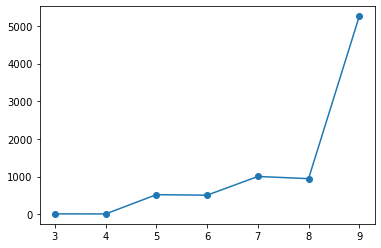


log(expense)


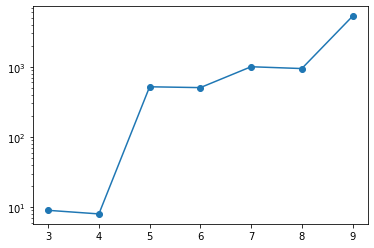


difference


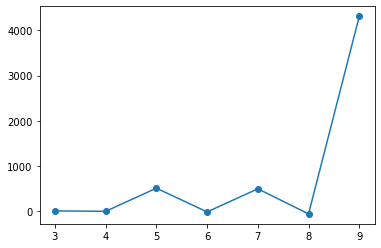

In [14]:
n=14


expenses = []
rows = []
big_leaf = (2**n)-1
used = []
proven = []
proven.append(3)
proven.append(5)
arrInfo = []
rowStartLabel = []
saveArrInfo = []
arrInfo, saveArrInfo, rowStartLabel = setStartArr(n)
counter = 0

print(arrInfo)

while len(proven) > 0:
    proven.sort()
    #print(proven)
    
    for i in proven:   
        if isIncluded(used, i) == False:       
            
            # RULE 1 : if x is orange V(x) becomes orange 
            if V(i) <= big_leaf + 1:                
                value1 = V(i)
                counter = 0
                
                if isIncluded(used, value1) == False:
                    proven.append(V(i))                 
                    counter = getCounter(rowStartLabel, value1)
                    arrInfo[counter-1] -= 1
                    
                    if arrInfo[counter-1] == 0:
                        expense = numbersAbove(saveArrInfo, arrInfo, counter)
                        expenses.append(expense)
                        rows.append(counter)
                        print("{0}: {1}".format(counter, expense))
                        print("{0}".format(arrInfo))

            # RULE 2 : if x is orange S(x) becomes orange (under the precise conditions of rule 2)
            r2 = ruleTwo(i)
            if r2: 
                
                if S(i) <= big_leaf + 1:
                    value2 = S(i)
                    counter = 0
                    
                    if isIncluded(used, value2) == False:
                        proven.append(S(i))
                        counter = getCounter(rowStartLabel, value2)
                        arrInfo[counter-1] -= 1

                        if arrInfo[counter-1] == 0:
                            expense = numbersAbove(saveArrInfo, arrInfo, counter)
                            expenses.append(expense)
                            rows.append(counter)
                            print("{0}: {1}".format(counter, expense))
                            print("{0}".format(arrInfo))

            # # RULE 3 : if x is orange and of type C then (4x-1)/3 becomes orange
            if getType(i) == 3:             
                value3 = int((4*i-1)/3)
                counter = 0
                
                if value3 <= big_leaf + 1:  
                    
                    if isIncluded(used, value3) == False:
                        proven.append(value3)
                        counter = getCounter(rowStartLabel, value3)                     
                        arrInfo[counter-1] -= 1
                        
                        if arrInfo[counter-1] == 0:
                            expense = numbersAbove(saveArrInfo, arrInfo, counter)
                            expenses.append(expense)
                            rows.append(counter)
                            print("{0}: {1}".format(counter, expense))
                            print("{0}".format(arrInfo))

            # # RULE 4 : if x is orange and of type A then G(x)/3 becomes orange                   
            if getType(i) == 1:                       
                value4 = int(fG(i)/3)                                     
                
                if isIncluded(used, value4) == False:   
                    proven.append(value4)
                    #print(value4)
                    counter = 0 
                    counter = getCounter(rowStartLabel, value4)               
                    arrInfo[counter-1] -= 1
                    
                    if arrInfo[counter-1] == 0:
                        expense = numbersAbove(saveArrInfo, arrInfo, counter)
                        expenses.append(expense)
                        rows.append(counter)
                        print("{0}: {1}".format(counter, expense))
                        print("{0}".format(arrInfo))

            proven.remove(i)
            used.append(i)
            break
        else:
            proven.remove(i)

dif = []
for i in range(0,len(expenses)):
    if i == 0:
        dif.append(expenses[i])
    else:
        dif.append(expenses[i] - expenses[i-1])

print()
print("expenses of the compleded rows starting with row 3")
print(expenses)
print()
print("total expense")
plt.plot(rows, expenses, marker = 'o', linestyle = 'solid')
plt.show()
plt.savefig("expanses.png",dpi=300)
print()
print("log(expense)")
plt.yscale('log')
plt.plot(rows, expenses, marker = 'o', linestyle = 'solid')
plt.show()
plt.savefig("expanses_log2.png",dpi=300)
print()
print("difference")
plt.plot(rows, dif, marker = 'o', linestyle = 'solid')
plt.show()




[0, 0, 1, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]
3: 9
[0, 0, 0, 2, 5, 13, 31, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]
4: 8
[0, 0, 0, 0, 4, 13, 31, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]
5: 519
[0, 0, 0, 0, 0, 1, 4, 15, 43, 140, 387, 924, 2047, 4096, 8192, 16384]
6: 505
[0, 0, 0, 0, 0, 0, 3, 15, 43, 140, 387, 924, 2047, 4096, 8192, 16384]
7: 1002
[0, 0, 0, 0, 0, 0, 0, 3, 9, 59, 245, 793, 1921, 4096, 8192, 16384]
8: 944
[0, 0, 0, 0, 0, 0, 0, 0, 7, 58, 245, 793, 1921, 4096, 8192, 16384]
9: 8588
[0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 30, 135, 543, 1966, 6209, 15034]
10: 23227
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 19, 90, 412, 1733, 6770]

expenses of the compleded rows starting with row 3
[9, 8, 519, 505, 1002, 944, 8588, 23227]

total expense


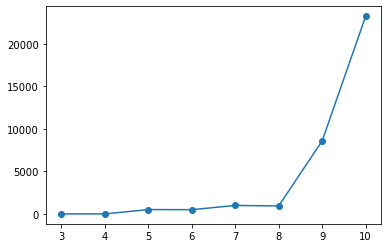


log(expense)


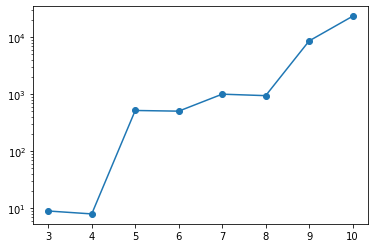


difference


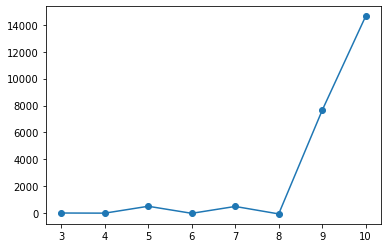

In [15]:
n=16


expenses = []
rows = []
big_leaf = (2**n)-1
used = []
proven = []
proven.append(3)
proven.append(5)
arrInfo = []
rowStartLabel = []
saveArrInfo = []
arrInfo, saveArrInfo, rowStartLabel = setStartArr(n)
counter = 0

print(arrInfo)

while len(proven) > 0:
    proven.sort()
    #print(proven)
    
    for i in proven:   
        if isIncluded(used, i) == False:       
            
            # RULE 1 : if x is orange V(x) becomes orange 
            if V(i) <= big_leaf + 1:                
                value1 = V(i)
                counter = 0
                
                if isIncluded(used, value1) == False:
                    proven.append(V(i))                 
                    counter = getCounter(rowStartLabel, value1)
                    arrInfo[counter-1] -= 1
                    
                    if arrInfo[counter-1] == 0:
                        expense = numbersAbove(saveArrInfo, arrInfo, counter)
                        expenses.append(expense)
                        rows.append(counter)
                        print("{0}: {1}".format(counter, expense))
                        print("{0}".format(arrInfo))

            # RULE 2 : if x is orange S(x) becomes orange (under the precise conditions of rule 2)
            r2 = ruleTwo(i)
            if r2: 
                
                if S(i) <= big_leaf + 1:
                    value2 = S(i)
                    counter = 0
                    
                    if isIncluded(used, value2) == False:
                        proven.append(S(i))
                        counter = getCounter(rowStartLabel, value2)
                        arrInfo[counter-1] -= 1

                        if arrInfo[counter-1] == 0:
                            expense = numbersAbove(saveArrInfo, arrInfo, counter)
                            expenses.append(expense)
                            rows.append(counter)
                            print("{0}: {1}".format(counter, expense))
                            print("{0}".format(arrInfo))

            # # RULE 3 : if x is orange and of type C then (4x-1)/3 becomes orange
            if getType(i) == 3:             
                value3 = int((4*i-1)/3)
                counter = 0
                
                if value3 <= big_leaf + 1:  
                    
                    if isIncluded(used, value3) == False:
                        proven.append(value3)
                        counter = getCounter(rowStartLabel, value3)                     
                        arrInfo[counter-1] -= 1
                        
                        if arrInfo[counter-1] == 0:
                            expense = numbersAbove(saveArrInfo, arrInfo, counter)
                            expenses.append(expense)
                            rows.append(counter)
                            print("{0}: {1}".format(counter, expense))
                            print("{0}".format(arrInfo))

            # # RULE 4 : if x is orange and of type A then G(x)/3 becomes orange                   
            if getType(i) == 1:                       
                value4 = int(fG(i)/3)                                     
                
                if isIncluded(used, value4) == False:   
                    proven.append(value4)
                    #print(value4)
                    counter = 0 
                    counter = getCounter(rowStartLabel, value4)               
                    arrInfo[counter-1] -= 1
                    
                    if arrInfo[counter-1] == 0:
                        expense = numbersAbove(saveArrInfo, arrInfo, counter)
                        expenses.append(expense)
                        rows.append(counter)
                        print("{0}: {1}".format(counter, expense))
                        print("{0}".format(arrInfo))

            proven.remove(i)
            used.append(i)
            break
        else:
            proven.remove(i)

dif = []
for i in range(0,len(expenses)):
    if i == 0:
        dif.append(expenses[i])
    else:
        dif.append(expenses[i] - expenses[i-1])

print()
print("expenses of the compleded rows starting with row 3")
print(expenses)
print()
print("total expense")
plt.plot(rows, expenses, marker = 'o', linestyle = 'solid')
plt.show()
plt.savefig("expanses.png",dpi=300)
print()
print("log(expense)")
plt.yscale('log')
plt.plot(rows, expenses, marker = 'o', linestyle = 'solid')
plt.show()
plt.savefig("expanses_log2.png",dpi=300)
print()
print("difference")
plt.plot(rows, dif, marker = 'o', linestyle = 'solid')
plt.show()




[0, 0, 1, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768]
3: 9
[0, 0, 0, 2, 5, 13, 31, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768]
4: 8
[0, 0, 0, 0, 4, 13, 31, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768]
5: 519
[0, 0, 0, 0, 0, 1, 4, 15, 43, 140, 387, 924, 2047, 4096, 8192, 16384, 32768]
6: 505
[0, 0, 0, 0, 0, 0, 3, 15, 43, 140, 387, 924, 2047, 4096, 8192, 16384, 32768]
7: 1002
[0, 0, 0, 0, 0, 0, 0, 3, 9, 59, 245, 793, 1921, 4096, 8192, 16384, 32768]
8: 944
[0, 0, 0, 0, 0, 0, 0, 0, 7, 58, 245, 793, 1921, 4096, 8192, 16384, 32768]
9: 8588
[0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 30, 135, 543, 1966, 6209, 15034, 32768]
10: 34002
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 19, 90, 412, 1733, 6770, 21993]

expenses of the compleded rows starting with row 3
[9, 8, 519, 505, 1002, 944, 8588, 34002]

total expense


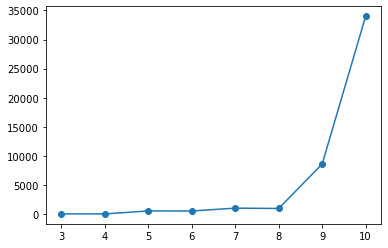


log(expense)


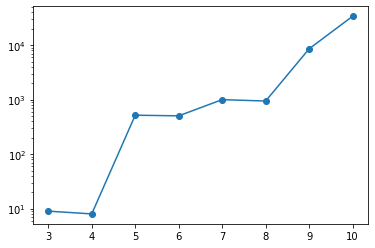


difference


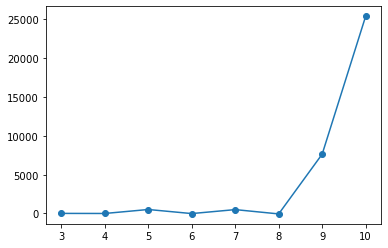

In [16]:
n=17


expenses = []
rows = []
big_leaf = (2**n)-1
used = []
proven = []
proven.append(3)
proven.append(5)
arrInfo = []
rowStartLabel = []
saveArrInfo = []
arrInfo, saveArrInfo, rowStartLabel = setStartArr(n)
counter = 0

print(arrInfo)

while len(proven) > 0:
    proven.sort()
    #print(proven)
    
    for i in proven:   
        if isIncluded(used, i) == False:       
            
            # RULE 1 : if x is orange V(x) becomes orange 
            if V(i) <= big_leaf + 1:                
                value1 = V(i)
                counter = 0
                
                if isIncluded(used, value1) == False:
                    proven.append(V(i))                 
                    counter = getCounter(rowStartLabel, value1)
                    arrInfo[counter-1] -= 1
                    
                    if arrInfo[counter-1] == 0:
                        expense = numbersAbove(saveArrInfo, arrInfo, counter)
                        expenses.append(expense)
                        rows.append(counter)
                        print("{0}: {1}".format(counter, expense))
                        print("{0}".format(arrInfo))

            # RULE 2 : if x is orange S(x) becomes orange (under the precise conditions of rule 2)
            r2 = ruleTwo(i)
            if r2: 
                
                if S(i) <= big_leaf + 1:
                    value2 = S(i)
                    counter = 0
                    
                    if isIncluded(used, value2) == False:
                        proven.append(S(i))
                        counter = getCounter(rowStartLabel, value2)
                        arrInfo[counter-1] -= 1

                        if arrInfo[counter-1] == 0:
                            expense = numbersAbove(saveArrInfo, arrInfo, counter)
                            expenses.append(expense)
                            rows.append(counter)
                            print("{0}: {1}".format(counter, expense))
                            print("{0}".format(arrInfo))

            # # RULE 3 : if x is orange and of type C then (4x-1)/3 becomes orange
            if getType(i) == 3:             
                value3 = int((4*i-1)/3)
                counter = 0
                
                if value3 <= big_leaf + 1:  
                    
                    if isIncluded(used, value3) == False:
                        proven.append(value3)
                        counter = getCounter(rowStartLabel, value3)                     
                        arrInfo[counter-1] -= 1
                        
                        if arrInfo[counter-1] == 0:
                            expense = numbersAbove(saveArrInfo, arrInfo, counter)
                            expenses.append(expense)
                            rows.append(counter)
                            print("{0}: {1}".format(counter, expense))
                            print("{0}".format(arrInfo))

            # # RULE 4 : if x is orange and of type A then G(x)/3 becomes orange                   
            if getType(i) == 1:                       
                value4 = int(fG(i)/3)                                     
                
                if isIncluded(used, value4) == False:   
                    proven.append(value4)
                    #print(value4)
                    counter = 0 
                    counter = getCounter(rowStartLabel, value4)               
                    arrInfo[counter-1] -= 1
                    
                    if arrInfo[counter-1] == 0:
                        expense = numbersAbove(saveArrInfo, arrInfo, counter)
                        expenses.append(expense)
                        rows.append(counter)
                        print("{0}: {1}".format(counter, expense))
                        print("{0}".format(arrInfo))

            proven.remove(i)
            used.append(i)
            break
        else:
            proven.remove(i)

dif = []
for i in range(0,len(expenses)):
    if i == 0:
        dif.append(expenses[i])
    else:
        dif.append(expenses[i] - expenses[i-1])

print()
print("expenses of the compleded rows starting with row 3")
print(expenses)
print()
print("total expense")
plt.plot(rows, expenses, marker = 'o', linestyle = 'solid')
plt.show()
plt.savefig("expanses.png",dpi=300)
print()
print("log(expense)")
plt.yscale('log')
plt.plot(rows, expenses, marker = 'o', linestyle = 'solid')
plt.show()
plt.savefig("expanses_log2.png",dpi=300)
print()
print("difference")
plt.plot(rows, dif, marker = 'o', linestyle = 'solid')
plt.show()


[0, 0, 1, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536]
3: 9
[0, 0, 0, 2, 5, 13, 31, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536]
4: 8
[0, 0, 0, 0, 4, 13, 31, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536]
5: 519
[0, 0, 0, 0, 0, 1, 4, 15, 43, 140, 387, 924, 2047, 4096, 8192, 16384, 32768, 65536]
6: 505
[0, 0, 0, 0, 0, 0, 3, 15, 43, 140, 387, 924, 2047, 4096, 8192, 16384, 32768, 65536]
7: 1002
[0, 0, 0, 0, 0, 0, 0, 3, 9, 59, 245, 793, 1921, 4096, 8192, 16384, 32768, 65536]
8: 944
[0, 0, 0, 0, 0, 0, 0, 0, 7, 58, 245, 793, 1921, 4096, 8192, 16384, 32768, 65536]
9: 8588
[0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 30, 135, 543, 1966, 6209, 15034, 32768, 65536]
10: 43140
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 19, 90, 412, 1733, 6770, 21993, 56398]
11: 93108
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 21, 106, 435, 1758, 7142, 27476]
12: 92087
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 106, 435, 1758, 7142, 27476]

expenses of the compleded rows starti

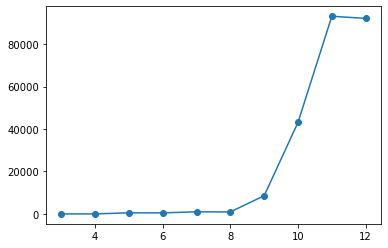


log(expense)


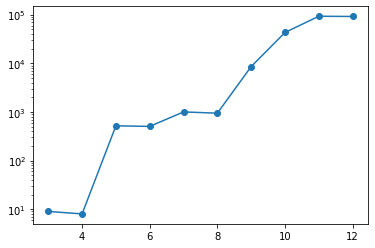


difference


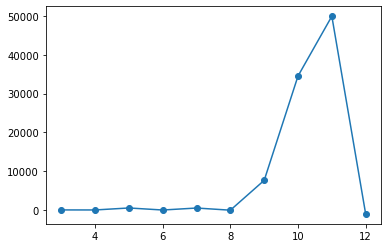

In [17]:
n=18


expenses = []
rows = []
big_leaf = (2**n)-1
used = []
proven = []
proven.append(3)
proven.append(5)
arrInfo = []
rowStartLabel = []
saveArrInfo = []
arrInfo, saveArrInfo, rowStartLabel = setStartArr(n)
counter = 0

print(arrInfo)

while len(proven) > 0:
    proven.sort()
    #print(proven)
    
    for i in proven:   
        if isIncluded(used, i) == False:       
            
            # RULE 1 : if x is orange V(x) becomes orange 
            if V(i) <= big_leaf + 1:                
                value1 = V(i)
                counter = 0
                
                if isIncluded(used, value1) == False:
                    proven.append(V(i))                 
                    counter = getCounter(rowStartLabel, value1)
                    arrInfo[counter-1] -= 1
                    
                    if arrInfo[counter-1] == 0:
                        expense = numbersAbove(saveArrInfo, arrInfo, counter)
                        expenses.append(expense)
                        rows.append(counter)
                        print("{0}: {1}".format(counter, expense))
                        print("{0}".format(arrInfo))

            # RULE 2 : if x is orange S(x) becomes orange (under the precise conditions of rule 2)
            r2 = ruleTwo(i)
            if r2: 
                
                if S(i) <= big_leaf + 1:
                    value2 = S(i)
                    counter = 0
                    
                    if isIncluded(used, value2) == False:
                        proven.append(S(i))
                        counter = getCounter(rowStartLabel, value2)
                        arrInfo[counter-1] -= 1

                        if arrInfo[counter-1] == 0:
                            expense = numbersAbove(saveArrInfo, arrInfo, counter)
                            expenses.append(expense)
                            rows.append(counter)
                            print("{0}: {1}".format(counter, expense))
                            print("{0}".format(arrInfo))

            # # RULE 3 : if x is orange and of type C then (4x-1)/3 becomes orange
            if getType(i) == 3:             
                value3 = int((4*i-1)/3)
                counter = 0
                
                if value3 <= big_leaf + 1:  
                    
                    if isIncluded(used, value3) == False:
                        proven.append(value3)
                        counter = getCounter(rowStartLabel, value3)                     
                        arrInfo[counter-1] -= 1
                        
                        if arrInfo[counter-1] == 0:
                            expense = numbersAbove(saveArrInfo, arrInfo, counter)
                            expenses.append(expense)
                            rows.append(counter)
                            print("{0}: {1}".format(counter, expense))
                            print("{0}".format(arrInfo))

            # # RULE 4 : if x is orange and of type A then G(x)/3 becomes orange                   
            if getType(i) == 1:                       
                value4 = int(fG(i)/3)                                     
                
                if isIncluded(used, value4) == False:   
                    proven.append(value4)
                    #print(value4)
                    counter = 0 
                    counter = getCounter(rowStartLabel, value4)               
                    arrInfo[counter-1] -= 1
                    
                    if arrInfo[counter-1] == 0:
                        expense = numbersAbove(saveArrInfo, arrInfo, counter)
                        expenses.append(expense)
                        rows.append(counter)
                        print("{0}: {1}".format(counter, expense))
                        print("{0}".format(arrInfo))

            proven.remove(i)
            used.append(i)
            break
        else:
            proven.remove(i)

dif = []
for i in range(0,len(expenses)):
    if i == 0:
        dif.append(expenses[i])
    else:
        dif.append(expenses[i] - expenses[i-1])

print()
print("expenses of the compleded rows starting with row 3")
print(expenses)
print()
print("total expense")
plt.plot(rows, expenses, marker = 'o', linestyle = 'solid')
plt.show()
plt.savefig("expanses.png",dpi=300)
print()
print("log(expense)")
plt.yscale('log')
plt.plot(rows, expenses, marker = 'o', linestyle = 'solid')
plt.show()
plt.savefig("expanses_log2.png",dpi=300)
print()
print("difference")
plt.plot(rows, dif, marker = 'o', linestyle = 'solid')
plt.show()


[0, 0, 1, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072]
3: 9
[0, 0, 0, 2, 5, 13, 31, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072]
4: 8
[0, 0, 0, 0, 4, 13, 31, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072]
5: 519
[0, 0, 0, 0, 0, 1, 4, 15, 43, 140, 387, 924, 2047, 4096, 8192, 16384, 32768, 65536, 131072]
6: 505
[0, 0, 0, 0, 0, 0, 3, 15, 43, 140, 387, 924, 2047, 4096, 8192, 16384, 32768, 65536, 131072]
7: 1002
[0, 0, 0, 0, 0, 0, 0, 3, 9, 59, 245, 793, 1921, 4096, 8192, 16384, 32768, 65536, 131072]
8: 944
[0, 0, 0, 0, 0, 0, 0, 0, 7, 58, 245, 793, 1921, 4096, 8192, 16384, 32768, 65536, 131072]
9: 8588
[0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 30, 135, 543, 1966, 6209, 15034, 32768, 65536, 131072]
10: 43140
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 19, 90, 412, 1733, 6770, 21993, 56398, 131072]
11: 135397
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 21, 106, 435, 1758, 7142, 27476, 88783]
12: 134376
[0, 0, 0, 0, 0, 0, 0, 0, 0,

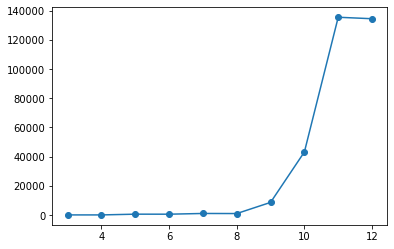


log(expense)


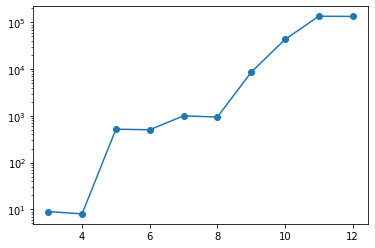


difference


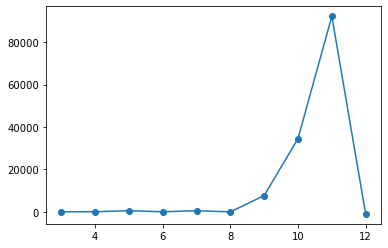

In [18]:
n=19


expenses = []
rows = []
big_leaf = (2**n)-1
used = []
proven = []
proven.append(3)
proven.append(5)
arrInfo = []
rowStartLabel = []
saveArrInfo = []
arrInfo, saveArrInfo, rowStartLabel = setStartArr(n)
counter = 0

print(arrInfo)

while len(proven) > 0:
    proven.sort()
    #print(proven)
    
    for i in proven:   
        if isIncluded(used, i) == False:       
            
            # RULE 1 : if x is orange V(x) becomes orange 
            if V(i) <= big_leaf + 1:                
                value1 = V(i)
                counter = 0
                
                if isIncluded(used, value1) == False:
                    proven.append(V(i))                 
                    counter = getCounter(rowStartLabel, value1)
                    arrInfo[counter-1] -= 1
                    
                    if arrInfo[counter-1] == 0:
                        expense = numbersAbove(saveArrInfo, arrInfo, counter)
                        expenses.append(expense)
                        rows.append(counter)
                        print("{0}: {1}".format(counter, expense))
                        print("{0}".format(arrInfo))

            # RULE 2 : if x is orange S(x) becomes orange (under the precise conditions of rule 2)
            r2 = ruleTwo(i)
            if r2: 
                
                if S(i) <= big_leaf + 1:
                    value2 = S(i)
                    counter = 0
                    
                    if isIncluded(used, value2) == False:
                        proven.append(S(i))
                        counter = getCounter(rowStartLabel, value2)
                        arrInfo[counter-1] -= 1

                        if arrInfo[counter-1] == 0:
                            expense = numbersAbove(saveArrInfo, arrInfo, counter)
                            expenses.append(expense)
                            rows.append(counter)
                            print("{0}: {1}".format(counter, expense))
                            print("{0}".format(arrInfo))

            # # RULE 3 : if x is orange and of type C then (4x-1)/3 becomes orange
            if getType(i) == 3:             
                value3 = int((4*i-1)/3)
                counter = 0
                
                if value3 <= big_leaf + 1:  
                    
                    if isIncluded(used, value3) == False:
                        proven.append(value3)
                        counter = getCounter(rowStartLabel, value3)                     
                        arrInfo[counter-1] -= 1
                        
                        if arrInfo[counter-1] == 0:
                            expense = numbersAbove(saveArrInfo, arrInfo, counter)
                            expenses.append(expense)
                            rows.append(counter)
                            print("{0}: {1}".format(counter, expense))
                            print("{0}".format(arrInfo))

            # # RULE 4 : if x is orange and of type A then G(x)/3 becomes orange                   
            if getType(i) == 1:                       
                value4 = int(fG(i)/3)                                     
                
                if isIncluded(used, value4) == False:   
                    proven.append(value4)
                    #print(value4)
                    counter = 0 
                    counter = getCounter(rowStartLabel, value4)               
                    arrInfo[counter-1] -= 1
                    
                    if arrInfo[counter-1] == 0:
                        expense = numbersAbove(saveArrInfo, arrInfo, counter)
                        expenses.append(expense)
                        rows.append(counter)
                        print("{0}: {1}".format(counter, expense))
                        print("{0}".format(arrInfo))

            proven.remove(i)
            used.append(i)
            break
        else:
            proven.remove(i)

dif = []
for i in range(0,len(expenses)):
    if i == 0:
        dif.append(expenses[i])
    else:
        dif.append(expenses[i] - expenses[i-1])

print()
print("expenses of the compleded rows starting with row 3")
print(expenses)
print()
print("total expense")
plt.plot(rows, expenses, marker = 'o', linestyle = 'solid')
plt.show()
plt.savefig("expanses.png",dpi=300)
print()
print("log(expense)")
plt.yscale('log')
plt.plot(rows, expenses, marker = 'o', linestyle = 'solid')
plt.show()
plt.savefig("expanses_log2.png",dpi=300)
print()
print("difference")
plt.plot(rows, dif, marker = 'o', linestyle = 'solid')
plt.show()
